In [ ]:
!pip install ucimlrepo

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)


In [74]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())

In [75]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    y_proba = model.predict_proba(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    }

import pandas as pd
metrics_df = pd.DataFrame(results).T
print(metrics_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.633333   0.577928  0.633333  0.602250  0.882968
Decision Tree        0.433333   0.499768  0.433333  0.456839  0.634001
Random Forest        0.550000   0.456481  0.550000  0.495180  0.822279
SVM                  0.533333   0.284444  0.533333  0.371014  0.765924


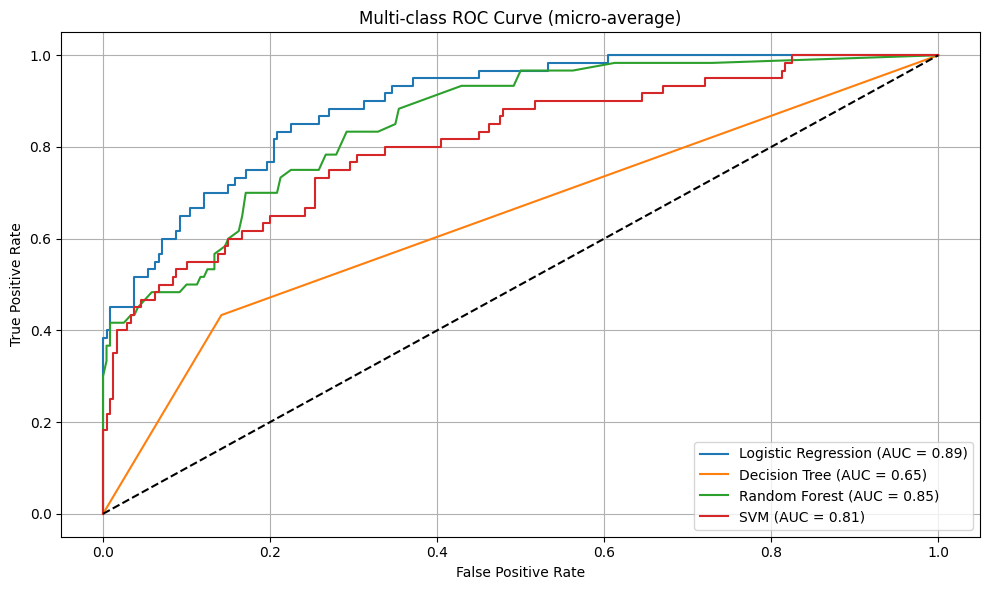

In [83]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multiclass ROC curve plotting
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (micro-average)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()